# Quantum Teleportation
In this code we simulate the quantum teleportation protocol between parties named "Alice" and "Bob.
Alice has a qubit in an unknown state $|\psi\rangle = a |0\rangle + b|1\rangle$, and she wants to send it to Bob. 

To do this they must, initialy, share an entangled Bell pair. Then Alice performs a Bell measurement between the qubit in state $|\psi\rangle$ and her qubit. She sends the two resulting classical bits to Bob who then will do nothing if the result is $00$, apply $X$ if the second qubit is $1$, and then apply $Z$ if the first qubit is $1$. At the end of the process, Bob's qubit will be in the exact same state $|\psi\rangle$. The original state is destroyed by Alice in the proccess because of the No-cloning theorem.

In [27]:
%matplotlib inline

from qiskit import *
from qiskit.tools.monitor import *
from qiskit.visualization import *
import random

provider = IBMQ.load_account()

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-01-11 00:44:52,343: Credentials are already in use. The existing account in the session will be replaced.


In [28]:
# First of all let us generate two random complex numbers that will be used as amplitudes for the psi state
# The real and imaginary parts may range from -1 to 1
a_re = random.random()*2 - 1
a_im = random.random()*2 - 1
b_re = random.random()*2 - 1
b_im = random.random()*2 - 1

# The resulting combination of comples numbers must be normalized
norm = (a_re**2 + a_im**2 + b_re**2 + b_im**2)**0.5
a = complex(a_re/norm, a_im/norm)
b = complex(b_re/norm, b_im/norm)

# We will use "a" and "b" as |psi> = a|0> + b|1>
print("Qubit to be teleported:")
print(a, "|0> + ", b, "|1>")

Qubit to be teleported:
(-0.6371552052778441-0.13546008443551236j) |0> +  (0.44108918907534655+0.6173525226261942j) |1>


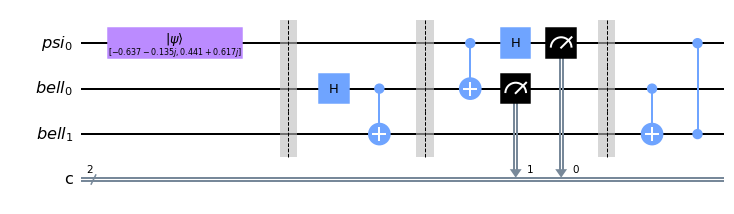

In [29]:
# Now we create the circuit to simulate the teleportation
psi = QuantumRegister(1, name = 'psi')
bell = QuantumRegister(2, name = 'bell')
cr = ClassicalRegister(2, name = 'c')

circ = QuantumCircuit(psi, bell, cr)

# Now we initialize the psi state in the qubit to be teleported
circ.initialize([a, b], psi)
circ.barrier()

# Let us save the state of the three qubits at the start of the process
backend = Aer.get_backend('statevector_simulator')
before = execute(circ, backend).result().get_statevector()

# We create the shared Bell pair
circ.h(bell[0])
circ.cx(bell[0], bell[1])
circ.barrier()

# Alice performs a Bell measurement in her two qubits
circ.cx(psi, bell[0])
circ.h(psi)
circ.measure([psi[0], bell[0]], cr)
circ.barrier()

# Then Bob applies X and/or Z gates in his qubit depending on the result
circ.cx(bell[0], bell[1])
circ.cz(psi, bell[1])

circ.draw(output = 'mpl')

In [30]:
# Now we execute the circuit and check the state of the three qubits at the end of the process
after = execute(circ, backend).result().get_statevector()

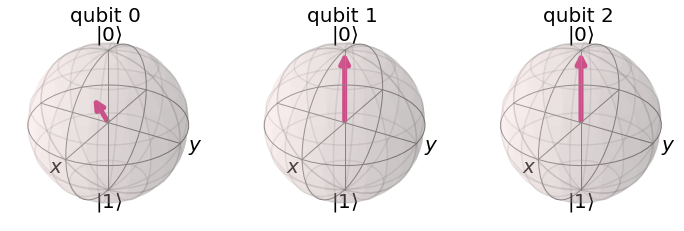

In [31]:
plot_bloch_multivector(before)

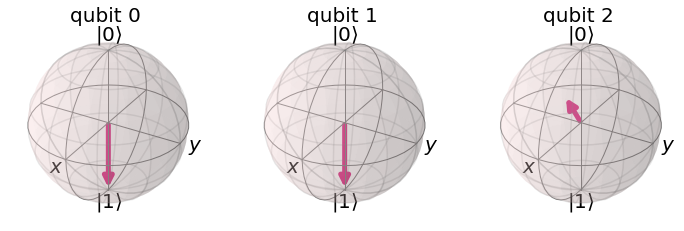

In [32]:
plot_bloch_multivector(after)